In [1]:
# Import thư viện hệ thống
import os

# Import thư viện phân tích dữ liệu và xử lý số liệu
import pandas as pd
import numpy as np
from scipy import stats

# Import thư viện để vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Import thư viện cho tiền xử lý dữ liệu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

# Import thư viện cho việc chia tập dữ liệu và tìm kiếm tham số
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Import các mô hình và đánh giá hiệu suất
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_score, accuracy_score,
                             roc_curve, auc, roc_auc_score)
import sklearn.metrics as metrics

# Import XGBoost
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Path to dataset files:", path)

print("Files in the dataset path:")
print(os.listdir(path))

100%|██████████| 80.6k/80.6k [00:00<00:00, 27.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1
Files in the dataset path:
['loan_approval_dataset.csv']


In [3]:
# Đọc dữ liệu
loan_original = pd.read_csv(os.path.join(path, "loan_approval_dataset.csv"))
print(loan_original.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [4]:
loan_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loan_original.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [6]:
loan_original[loan_original['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [7]:
loan_original.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
loan_original.columns = loan_original.columns.str.replace(' ', '')
loan_original.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
# mã hóa dữ liệu

loan=loan_original.drop(['loan_id'], axis=1)

label_encoder = LabelEncoder()

loan['loan_status'] = label_encoder.fit_transform(loan['loan_status'])

loan['loan_status'] = [1 if label == 0 else 0 for label in loan['loan_status']]

In [10]:
rank=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[rank])
loan['education'] = oe.fit_transform(loan[['education']])

oe = OrdinalEncoder()
loan['self_employed'] = oe.fit_transform(loan[['self_employed']])

In [11]:
loan['education'], loan['self_employed'], loan['loan_status']

(0       1.0
 1       0.0
 2       1.0
 3       1.0
 4       0.0
        ... 
 4264    1.0
 4265    0.0
 4266    0.0
 4267    0.0
 4268    1.0
 Name: education, Length: 4269, dtype: float64,
 0       0.0
 1       1.0
 2       0.0
 3       0.0
 4       1.0
        ... 
 4264    1.0
 4265    1.0
 4266    0.0
 4267    0.0
 4268    0.0
 Name: self_employed, Length: 4269, dtype: float64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 4264    0
 4265    1
 4266    0
 4267    1
 4268    1
 Name: loan_status, Length: 4269, dtype: int64)

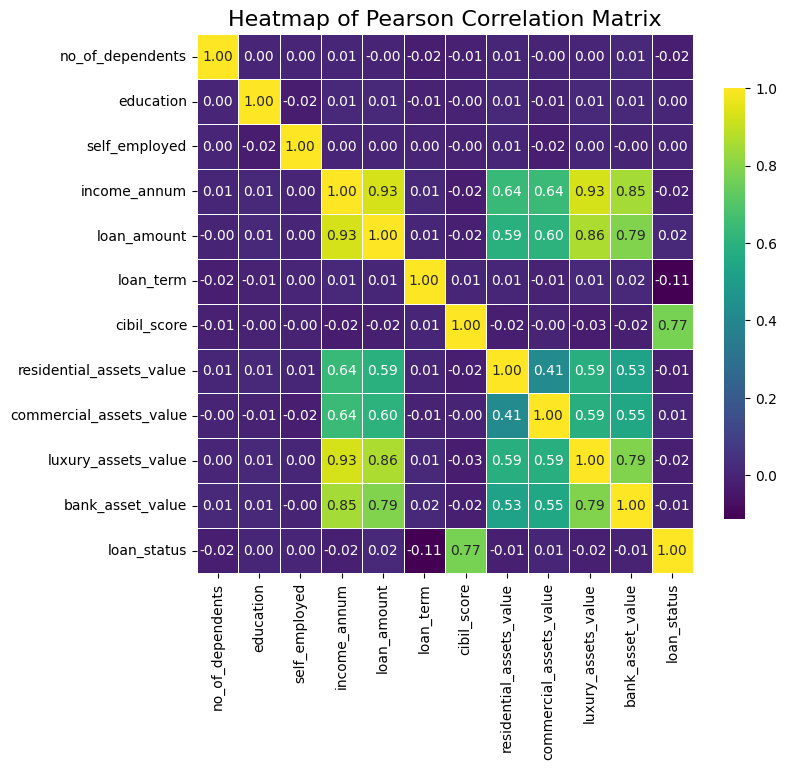

In [12]:
# Tính toán ma trận tương quan
correlation_matrix = loan.corr(method='pearson')
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='viridis',
            linewidths=0.5,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Heatmap of Pearson Correlation Matrix', fontsize=16)
plt.show()


In [13]:
# Kiểm định Chi-Square
contingency_dependents = pd.crosstab(loan['no_of_dependents'], loan['loan_status'])


chi2_dependents, p_dependents, dof_dependents, expected_dependents = stats.chi2_contingency(contingency_dependents)


print("Chi-Square Value:", chi2_dependents)
print("p-value:", p_dependents)
print("Degrees of Freedom:", dof_dependents)
print("Expected Frequencies Table:")
print(expected_dependents)

Chi-Square Value: 2.4541838909370166
p-value: 0.7833787033887645
Degrees of Freedom: 5
Expected Frequencies Table:
[[269.02225346 442.97774654]
 [263.3546498  433.6453502 ]
 [267.51089248 440.48910752]
 [274.68985711 452.31014289]
 [284.1358632  467.8641368 ]
 [254.28648395 418.71351605]]


In [14]:
contingency_education = pd.crosstab(loan['education'], loan['loan_status'])

chi2_education, p_education, dof_education, expected_education = stats.chi2_contingency(contingency_education)

print("Chi-Square Value:", chi2_education)
print("p-value:", p_education)
print("Degrees of Freedom:", dof_education)
print("Expected Frequencies Table:")
print(expected_education)

Chi-Square Value: 0.08395754138250573
p-value: 0.7720042291016309
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 802.91051769 1322.08948231]
 [ 810.08948231 1333.91051769]]


In [15]:
contingency_self_employed = pd.crosstab(loan['self_employed'], loan['loan_status'])

chi2_self_employed, p_self_employed, dof_self_employed, expected_self_employed = stats.chi2_contingency(contingency_self_employed)

print("Chi-Square Value:", chi2_self_employed)
print("p-value:", p_self_employed)
print("Degrees of Freedom:", dof_self_employed)
print("Expected Frequencies Table:")
print(expected_self_employed)

Chi-Square Value: 0.0
p-value: 1.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 800.64347622 1318.35652378]
 [ 812.35652378 1337.64347622]]


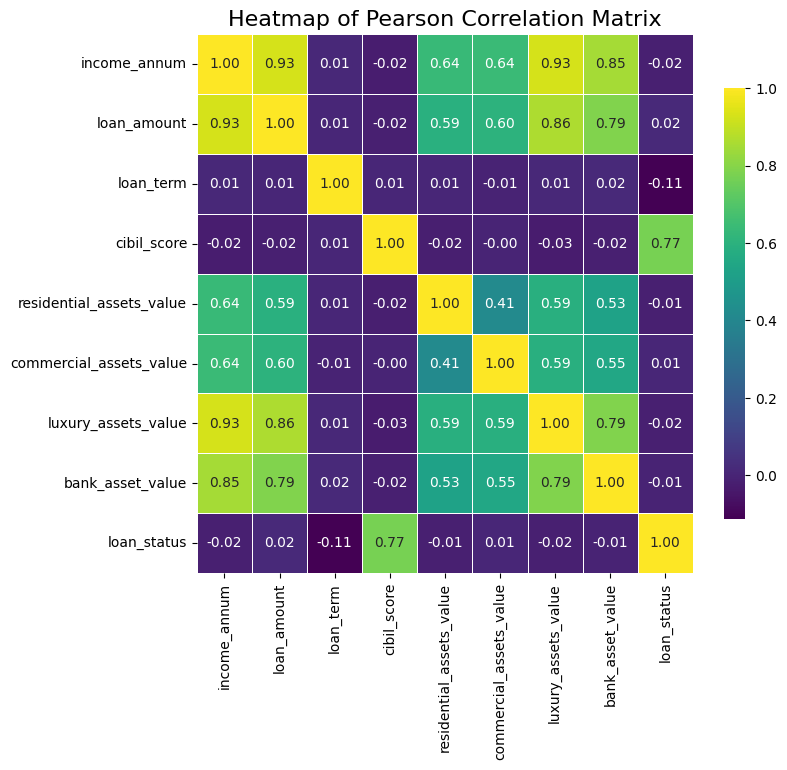

In [16]:
loan = loan.drop(['no_of_dependents','education','self_employed'], axis=1)
# Tính toán ma trận tương quan
correlation_matrix = loan.corr(method='pearson')
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='viridis',
            linewidths=0.5,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Heatmap of Pearson Correlation Matrix', fontsize=16)
plt.show()


In [17]:
loan.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [18]:
# Scale dữ liệu
# Create a StandardScaler instance
scaler = StandardScaler()

x = loan.drop(columns=['loan_status'])
y = loan['loan_status']
numerical_columns = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())

Scaled Feature Variables (x):
   income_annum  loan_amount  loan_term  cibil_score  \
0      1.617979     1.633052   0.192617     1.032792   
1     -0.341750    -0.324414  -0.508091    -1.061051   
2      1.439822     1.610933   1.594031    -0.544840   
3      1.119139     1.721525  -0.508091    -0.771045   
4      1.689242     1.002681   1.594031    -1.264055   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                 -0.780058                 2.877289             0.832028   
1                 -0.733924                -0.631921            -0.694993   
2                 -0.057300                -0.107818             1.996520   
3                  1.649637                -0.381263             0.897943   
4                  0.757724                 0.735304             1.568075   

   bank_asset_value  
0          0.930304  
1         -0.515936  
2          2.407316  
3          0.899533  
4          0.007172  

Target Variable (y):
0    1
1    0
2 

In [19]:
# chia tập dữ liệu thành 70-15-15
x_temp, x_test, y_temp, y_test = train_test_split(x, y,  test_size = 0.15, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.17647, random_state=42)

In [20]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape


((2987, 8), (2987,), (641, 8), (641,), (641, 8), (641,))

# **XGBOOST**

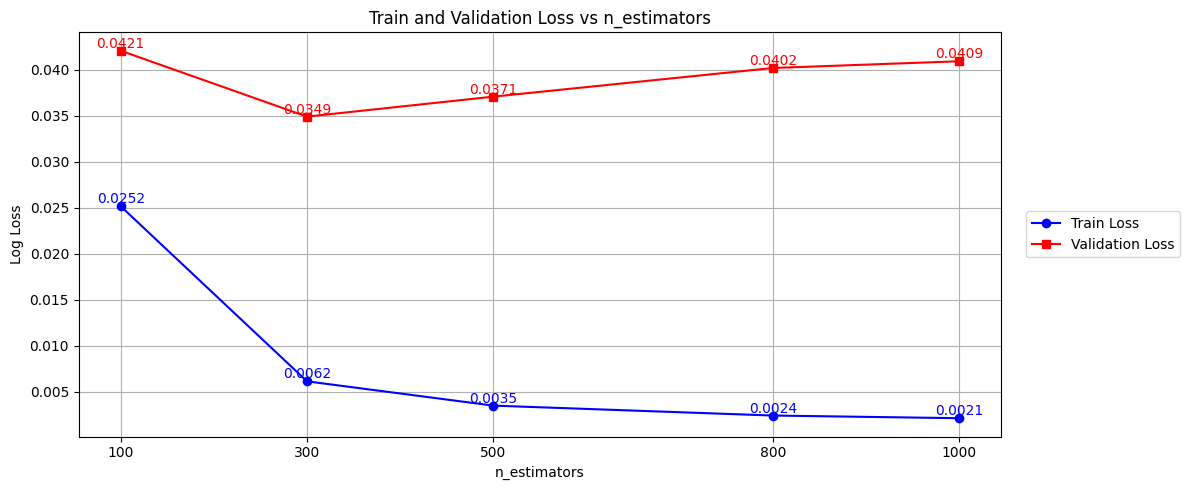

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Các giá trị cần kiểm tra cho n_estimators
n_estimators_values = [100, 300, 500, 800, 1000]

train_losses = []
val_losses = []

# Huấn luyện mô hình với các giá trị n_estimators khác nhau
for n_estimators in n_estimators_values:
    xgb_classifier = XGBClassifier(
        random_state=42,
        n_estimators=n_estimators,  # Giá trị cần tìm
        reg_lambda=0.1,             # Sử dụng reg_lambda cố định
        max_depth=5,                # Sử dụng max_depth cố định
        learning_rate=0.05,
    )

    xgb_classifier.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_val, y_val)],
        verbose=False,
    )

    # Lấy log loss của train và validation từ evals_result_
    results = xgb_classifier.evals_result_
    train_losses.append(results['validation_0']['logloss'][-1])  # Loss cuối cùng
    val_losses.append(results['validation_1']['logloss'][-1])    # Loss cuối cùng

# Xác định n_estimators tối ưu
best_val_loss_idx = np.argmin(val_losses)
best_n_estimators = n_estimators_values[best_val_loss_idx]
best_val_loss = val_losses[best_val_loss_idx]

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.plot(n_estimators_values, train_losses, label="Train Loss", marker='o', color='b')
plt.plot(n_estimators_values, val_losses, label="Validation Loss", marker='s', color='r')


for i in range(len(n_estimators_values)):
    plt.text(n_estimators_values[i], val_losses[i], f'{val_losses[i]:.4f}', color='r', ha='center', va='bottom')
for i in range(len(n_estimators_values)):
    plt.text(n_estimators_values[i], train_losses[i], f'{train_losses[i]:.4f}', color='b', ha='center', va='bottom')

plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.title("Train and Validation Loss vs n_estimators")
plt.xticks(n_estimators_values)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


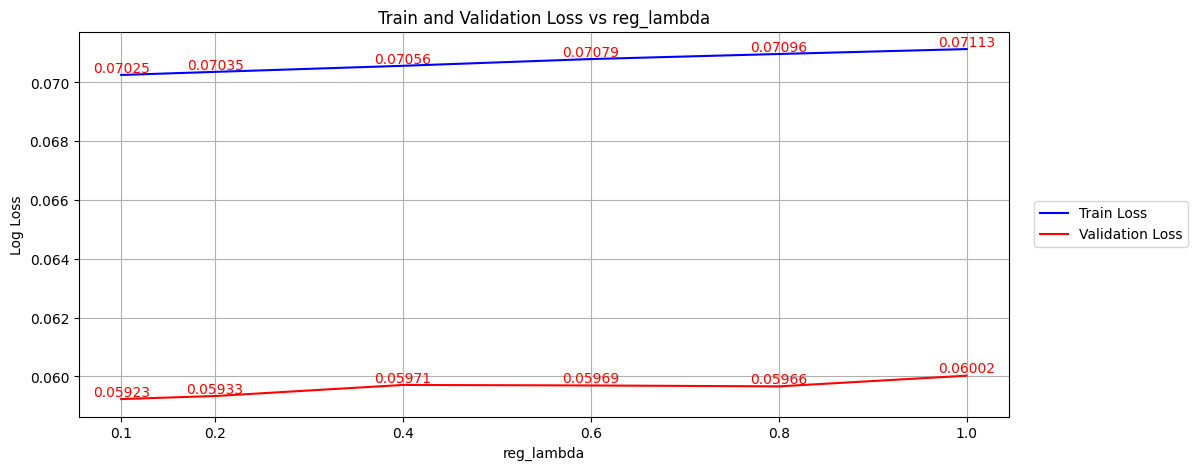

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Các giá trị cần kiểm tra cho reg_lambda
reg_lambda_values = [0.1,0.2,0.4,0.6,0.8,1]
# Danh sách lưu trữ loss
train_losses = []
val_losses = []

# Huấn luyện mô hình với các giá trị reg_lambda khác nhau
for reg_lambda in reg_lambda_values:
    xgb_classifier = XGBClassifier(
        random_state=42,
        n_estimators=300,
        reg_lambda=reg_lambda,
        max_depth=1,
        learning_rate=0.1,
    )

    xgb_classifier.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_val, y_val)],
        verbose=False,
    )

    # Lấy log loss của train và validation từ evals_result_
    results = xgb_classifier.evals_result_
    train_losses.append(results['validation_0']['logloss'][-1])  # Loss cuối cùng
    val_losses.append(results['validation_1']['logloss'][-1])    # Loss cuối cùng

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.plot(reg_lambda_values, train_losses, label="Train Loss", color='b')
plt.plot(reg_lambda_values, val_losses, label="Validation Loss",  color='r')
for i in range(len(reg_lambda_values)):
    plt.text(reg_lambda_values[i], train_losses[i], f'{train_losses[i]:.5f}', color='r', ha='center', va='bottom')
for i in range(len(reg_lambda_values)):
    plt.text(reg_lambda_values[i], val_losses[i], f'{val_losses[i]:.5f}', color='r', ha='center', va='bottom')
plt.xlabel("reg_lambda")
plt.ylabel("Log Loss")
plt.title("Train and Validation Loss vs reg_lambda")
plt.xticks(reg_lambda_values)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()


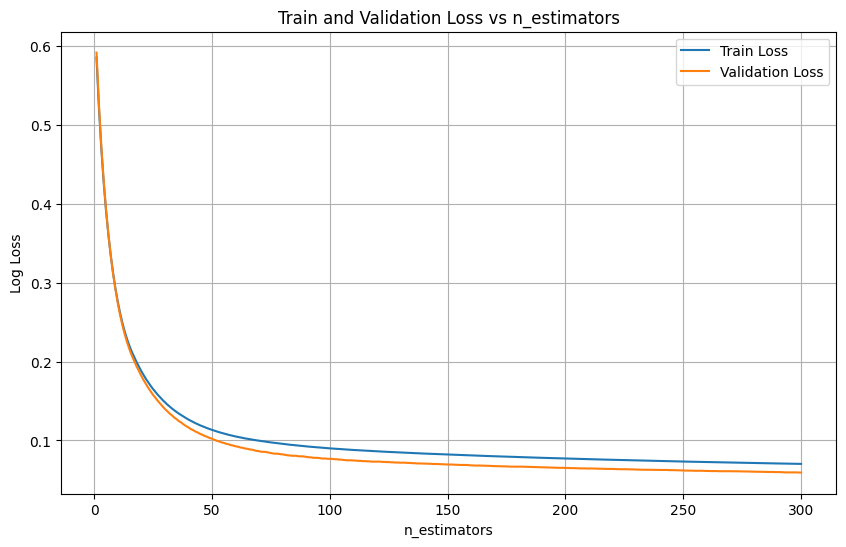

In [23]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Huấn luyện mô hình XGBoost với thông tin theo dõi quá trình học
xgb_classifier = XGBClassifier(
    random_state=42,
    n_estimators=300,
    reg_lambda=0.1,
    max_depth=1,
    learning_rate=0.1,
)

xgb_classifier.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    verbose=False,
)

# Lấy kết quả quá trình huấn luyện
results = xgb_classifier.evals_result_

# Trích xuất loss của train và validation
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.title("Train and Validation Loss vs n_estimators")
plt.legend()
plt.grid(True)
plt.show()


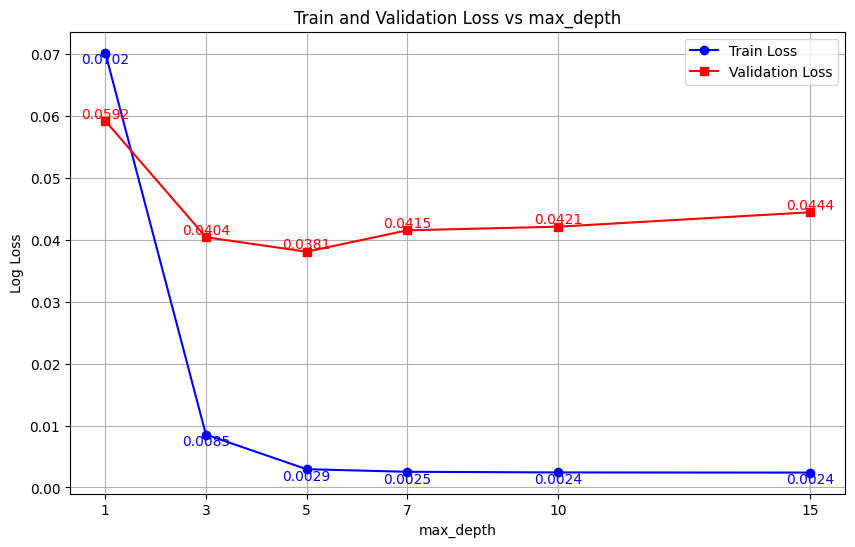

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Các giá trị cần kiểm tra cho max_depth
max_depth_values = [1,3, 5, 7, 10, 15]
# Danh sách lưu trữ loss
train_losses = []
val_losses = []

# Huấn luyện mô hình với các giá trị max_depth khác nhau
for max_depth in max_depth_values:
    xgb_classifier = XGBClassifier(
        random_state=42,
        n_estimators=300,
        reg_lambda=0.1,
        max_depth=max_depth,
        learning_rate=0.1,
    )

    xgb_classifier.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_val, y_val)],
        verbose=False,
    )

    # Lấy log loss của train và validation từ evals_result_
    results = xgb_classifier.evals_result_
    train_losses.append(results['validation_0']['logloss'][-1])  # Loss cuối cùng
    val_losses.append(results['validation_1']['logloss'][-1])    # Loss cuối cùng

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_losses, label="Train Loss", marker='o', color='b')
plt.plot(max_depth_values, val_losses, label="Validation Loss", marker='s', color='r')


# Thêm chú thích cho các điểm của validation
for i in range(len(max_depth_values)):
    plt.text(max_depth_values[i], val_losses[i], f'{val_losses[i]:.4f}', color='r', ha='center', va='bottom')

# Thêm chú thích cho các điểm của train
for i in range(len(max_depth_values)):
    plt.text(max_depth_values[i], train_losses[i], f'{train_losses[i]:.4f}', color='b', ha='center', va='top')

# Sử dụng log scale nhưng hiển thị giá trị chính xác trên trục x
plt.xlabel("max_depth")
plt.ylabel("Log Loss")
plt.title("Train and Validation Loss vs max_depth")
plt.xticks(max_depth_values)  # Hiển thị giá trị max_depth rõ ràng trên trục x
plt.legend()
plt.grid(True)
plt.show()


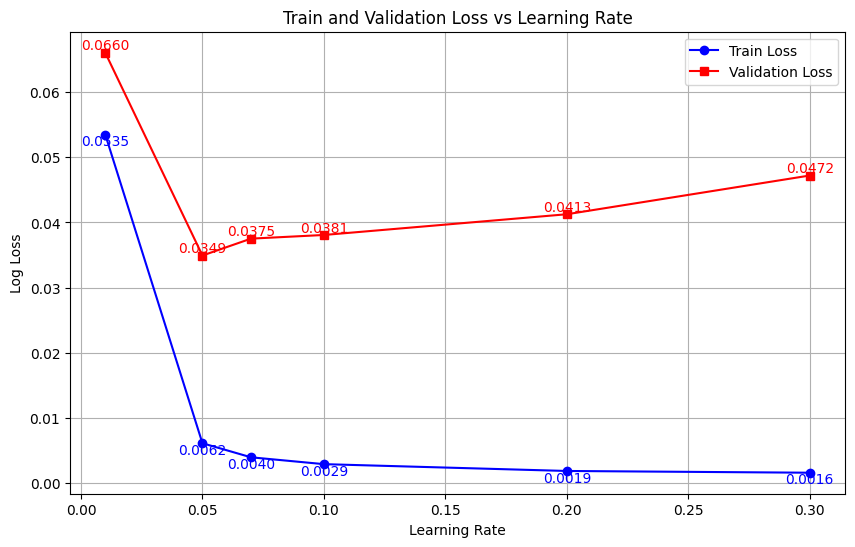

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Các giá trị cần kiểm tra cho learning_rate
learning_rate_values = [0.01, 0.05, 0.07, 0.1, 0.2, 0.3]
# Danh sách lưu trữ loss
train_losses = []
val_losses = []

# Huấn luyện mô hình với các giá trị learning_rate khác nhau
for learning_rate in learning_rate_values:
    xgb_classifier = XGBClassifier(
        random_state=42,
        n_estimators=300,
        reg_lambda=0.1,
        max_depth=5,
        learning_rate=learning_rate,
    )

    xgb_classifier.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_val, y_val)],
        verbose=False,
    )

    # Lấy log loss của train và validation từ evals_result_
    results = xgb_classifier.evals_result_
    train_losses.append(results['validation_0']['logloss'][-1])  # Loss cuối cùng
    val_losses.append(results['validation_1']['logloss'][-1])    # Loss cuối cùng

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_losses, label="Train Loss", marker='o', color='b')
plt.plot(learning_rate_values, val_losses, label="Validation Loss", marker='s', color='r')

# Thêm chú thích cho các điểm
for i in range(len(learning_rate_values)):
    plt.text(learning_rate_values[i], val_losses[i], f'{val_losses[i]:.4f}', color='r', ha='center', va='bottom')

for i in range(len(learning_rate_values)):
    plt.text(learning_rate_values[i], train_losses[i], f'{train_losses[i]:.4f}', color='b', ha='center', va='top')

# Thêm tiêu đề và chỉnh sửa trục x
plt.xlabel("Learning Rate")
plt.ylabel("Log Loss")
plt.title("Train and Validation Loss vs Learning Rate")
plt.legend()
plt.grid(True)
plt.show()

Validation Accuracy: 0.989


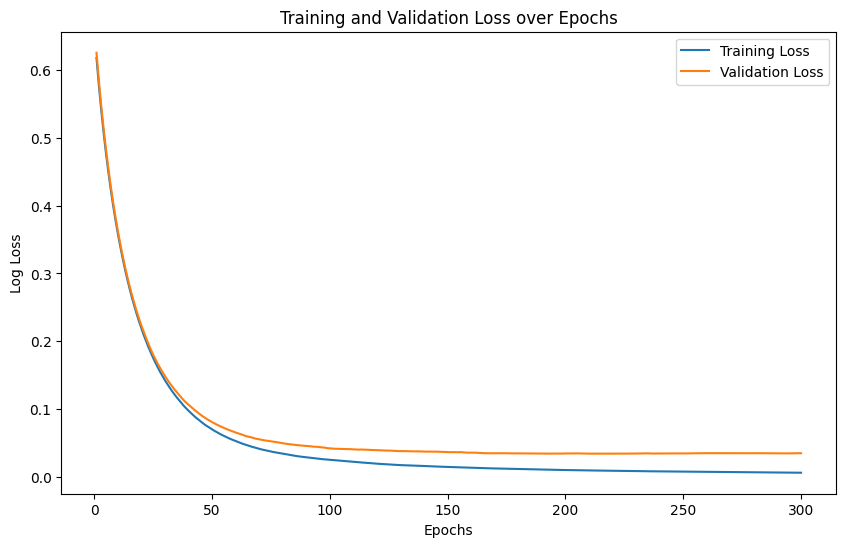

In [29]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

xgb_classifier = XGBClassifier(
    random_state=42,
    n_estimators=300,
    reg_lambda=0.1,
    max_depth=5,
    learning_rate=0.05,

)

xgb_classifier.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    verbose=False,
)

train_loss = xgb_classifier.evals_result()['validation_0']['logloss']
val_loss = xgb_classifier.evals_result()['validation_1']['logloss']
epochs = range(1, len(train_loss) + 1)

# Dự đoán trên tập validation
y_val_xgb = xgb_classifier.predict(x_val)
print('Validation Accuracy:', '%.3f' % accuracy_score(y_val, y_val_xgb))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()


In [27]:
# Dự đoán trên tập test
y_test_pred = xgb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", '%.4f' % accuracy)

Test Accuracy: 0.9813


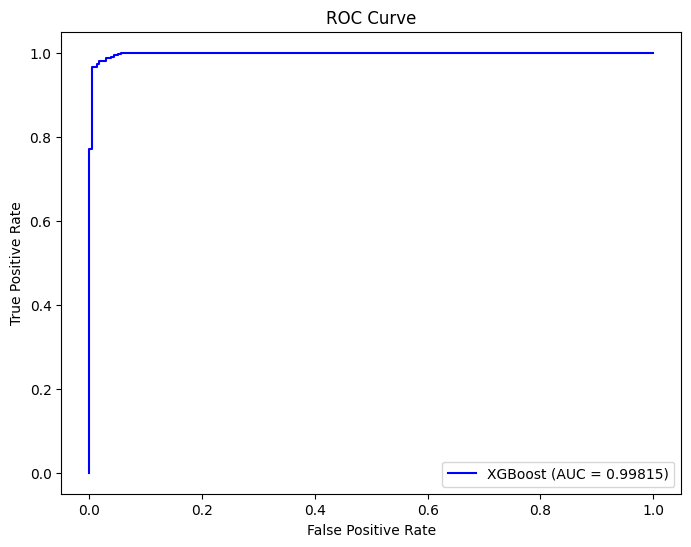

In [28]:
xgb_probs = xgb_classifier.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='blue', label=f'XGBoost (AUC = {xgb_auc:.5f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# PHÂN TÍCH TH LỖI


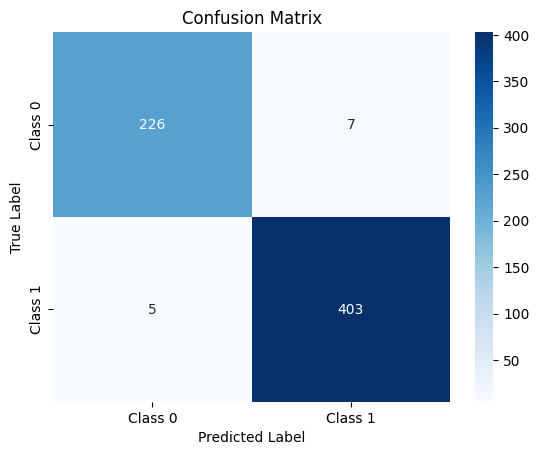

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Lấy các chỉ số của dự đoán sai (False Positives và False Negatives)
false_positive_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]
false_negative_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]

# Lấy dữ liệu đã chuẩn hóa của False Positives và False Negatives
false_positives_scaled = x_test.iloc[false_positive_indices]
false_negatives_scaled = x_test.iloc[false_negative_indices]

# Đảo ngược chuẩn hóa để lấy lại dữ liệu ban đầu
false_positives_original = scaler.inverse_transform(false_positives_scaled[numerical_columns])
false_negatives_original = scaler.inverse_transform(false_negatives_scaled[numerical_columns])

# Chuyển lại dữ liệu thành DataFrame với các cột gốc
false_positives_original_df = pd.DataFrame(false_positives_original, columns=numerical_columns)
false_negatives_original_df = pd.DataFrame(false_negatives_original, columns=numerical_columns)

# Tính toán lại 'asset' từ các cột liên quan
false_positives_original_df['asset'] = (false_positives_original_df['residential_assets_value'] +
                                   false_positives_original_df['commercial_assets_value'] +
                                   false_positives_original_df['luxury_assets_value'] +
                                   false_positives_original_df['bank_asset_value'])

false_negatives_original_df['asset'] = (false_negatives_original_df['residential_assets_value'] +
                                    false_negatives_original_df['commercial_assets_value'] +
                                    false_negatives_original_df['luxury_assets_value'] +
                                    false_negatives_original_df['bank_asset_value'])

# Chọn các cột cần thiết để hiển thị theo bảng đã đưa, bao gồm loan_term
false_positives_original_df = false_positives_original_df[['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'asset']]
false_negatives_original_df = false_negatives_original_df[['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'asset']]
# In kết quả
print("False Positive Data (Original):")
print(false_positives_original_df.to_string(index=True))

print("\nFalse Negative Data (Original):")
print(false_negatives_original_df.to_string(index=True))

False Positive Data (Original):
   income_annum  loan_amount  loan_term  cibil_score       asset
0     9800000.0   27000000.0        2.0        395.0  54400000.0
1     8300000.0   31400000.0        6.0        674.0  25900000.0
2     1800000.0    3700000.0        2.0        505.0  12200000.0
3     2100000.0    4700000.0        2.0        546.0  16400000.0
4     8000000.0   17800000.0       20.0        549.0  50300000.0
5     6800000.0   20000000.0        4.0        459.0  47400000.0
6      900000.0    2200000.0        2.0        415.0   5900000.0

False Negative Data (Original):
   income_annum  loan_amount  loan_term  cibil_score       asset
0      800000.0    2600000.0        2.0        439.0   2800000.0
1     4700000.0   15700000.0        4.0        468.0  38200000.0
2     4400000.0   14600000.0        4.0        499.0  29600000.0
3     8400000.0   25200000.0        2.0        308.0  55600000.0
4      400000.0    1400000.0        4.0        302.0   2300000.0


In [ ]:
# Lấy các chỉ số của dự đoán sai (False Positives và False Negatives)
false_positive_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]
false_negative_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]

# Lấy dữ liệu đã chuẩn hóa của False Positives và False Negatives
false_positives_scaled = x_test.iloc[false_positive_indices]
false_negatives_scaled = x_test.iloc[false_negative_indices]

# Đảo ngược chuẩn hóa để lấy lại dữ liệu ban đầu
false_positives_original = scaler.inverse_transform(false_positives_scaled[numerical_columns])
false_negatives_original = scaler.inverse_transform(false_negatives_scaled[numerical_columns])

# Chuyển lại dữ liệu thành DataFrame với các cột gốc
false_positives_original_df = pd.DataFrame(false_positives_original, columns=numerical_columns)
false_negatives_original_df = pd.DataFrame(false_negatives_original, columns=numerical_columns)


# In kết quả
print("False Positive Data (Original):")
print(false_positives_original_df.to_string(index=False))

print("\nFalse Negative Data (Original):")
print(false_negatives_original_df.to_string(index=False))

False Positive Data (Original):
 income_annum  loan_amount  loan_term  cibil_score  residential_assets_value  commercial_assets_value  luxury_assets_value  bank_asset_value
    9800000.0   27000000.0        2.0        395.0                18700000.0                3000000.0           23000000.0         9700000.0
    8300000.0   31400000.0        6.0        674.0                 1000000.0                1600000.0           17200000.0         6100000.0
    1800000.0    3700000.0        2.0        505.0                 3900000.0                2400000.0            4500000.0         1400000.0
    2100000.0    4700000.0        2.0        546.0                 6000000.0                3200000.0            5700000.0         1500000.0
    8000000.0   17800000.0       20.0        549.0                 2400000.0                9700000.0           27400000.0        10800000.0
    6800000.0   20000000.0        4.0        459.0                14500000.0                3000000.0           25000000.0

In [ ]:
# Lọc dữ liệu của các False Positives và False Negatives từ dữ liệu đã chuẩn hóa
false_positives_scaled = x_test.iloc[false_positive_indices].copy()
false_negatives_scaled = x_test.iloc[false_negative_indices].copy()

# Tính toán lại 'asset' từ các cột liên quan
false_positives_scaled['asset'] = (false_positives_scaled['residential_assets_value'] +
                                   false_positives_scaled['commercial_assets_value'] +
                                   false_positives_scaled['luxury_assets_value'] +
                                   false_positives_scaled['bank_asset_value']) / 4

false_negatives_scaled['asset'] = (false_negatives_scaled['residential_assets_value'] +
                                    false_negatives_scaled['commercial_assets_value'] +
                                    false_negatives_scaled['luxury_assets_value'] +
                                    false_negatives_scaled['bank_asset_value']) / 4

# Chọn các cột cần thiết để hiển thị theo bảng đã đưa, bao gồm loan_term
false_positives_scaled_result = false_positives_scaled[['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'asset']]
false_negatives_scaled_result = false_negatives_scaled[['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'asset']]

# In kết quả False Positives và False Negatives
print("False Positive Data:")
print(false_positives_scaled_result)

print("\nFalse Negative Data:")
print(false_negatives_scaled_result)


False Positive Data:
      income_annum  loan_amount  loan_term  cibil_score     asset
1174      1.689242     1.312337  -1.559151    -1.188654  0.898825
2856      1.154770     1.798939  -0.858444     0.429580 -0.297631
2252     -1.161272    -1.264440  -1.559151    -0.550641 -0.850926
254      -1.054378    -1.153849  -1.559151    -0.312836 -0.683969
3796      1.047876     0.294897   1.594031    -0.295435  0.859327
751       0.620299     0.538198  -1.208798    -0.817446  0.423034
3317     -1.481955    -1.430327  -1.559151    -1.072651 -1.115463

False Negative Data:
      income_annum  loan_amount  loan_term  cibil_score     asset
3624     -1.517587    -1.386090  -1.559151    -0.933449 -1.265597
3490     -0.127961     0.062655  -1.208798    -0.765245  0.154840
315      -0.234855    -0.058995  -1.208798    -0.585441 -0.067938
1235      1.190402     1.113273  -1.559151    -1.693264  1.040834
2920     -1.660112    -1.518800  -1.208798    -1.728065 -1.275825


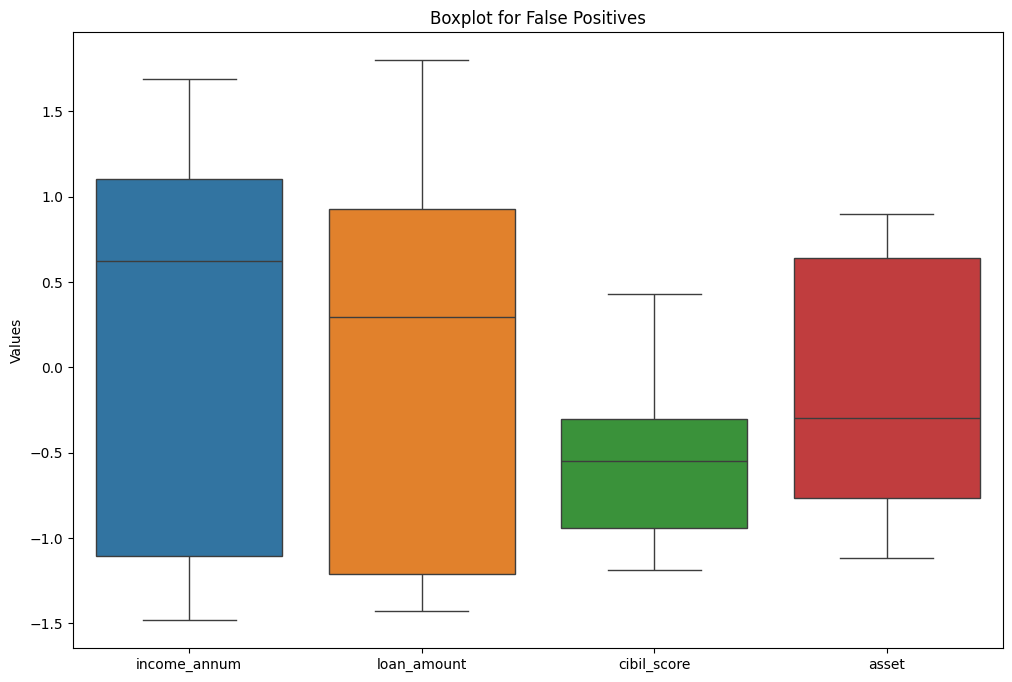

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=false_positives_scaled[['income_annum', 'loan_amount', 'cibil_score', 'asset']])
plt.title('Boxplot for False Positives')
plt.ylabel('Values')
plt.show()

In [ ]:
# Lấy các chỉ số của dự đoán sai (False Positives và False Negatives)
false_positive_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]
false_negative_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]

# Lấy dữ liệu đã chuẩn hóa của False Positives và False Negatives
false_positives_scaled = x_test.iloc[false_positive_indices]
false_negatives_scaled = x_test.iloc[false_negative_indices]

# Đảo ngược chuẩn hóa để lấy lại dữ liệu ban đầu
# Chỉ áp dụng inverse_transform cho các cột số (numerical_columns)
false_positives_original = scaler.inverse_transform(false_positives_scaled[numerical_columns])
false_negatives_original = scaler.inverse_transform(false_negatives_scaled[numerical_columns])

# Chuyển lại dữ liệu thành DataFrame với các cột gốc
false_positives_original_df = pd.DataFrame(false_positives_original, columns=numerical_columns)
false_negatives_original_df = pd.DataFrame(false_negatives_original, columns=numerical_columns)

# In kết quả
print("False Positive Data (Original):")
print(false_positives_original_df)

print("\nFalse Negative Data (Original):")
print(false_negatives_original_df)


False Positive Data (Original):
   income_annum  loan_amount  loan_term  cibil_score  \
0      1.708959     1.330251  -1.554979    -1.182708   
1      1.171930     1.819181  -0.850918     0.443269   
2     -1.155196    -1.258857  -1.554979    -0.541642   
3     -1.047790    -1.147736  -1.554979    -0.302699   
4      1.064524     0.307942   1.613292    -0.285215   
5      0.634901     0.552407  -1.202949    -0.809724   
6     -1.477413    -1.425538  -1.554979    -1.066151   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  1.746422                -0.440142             0.880759   
1                 -0.988476                -0.760688             0.240535   
2                 -0.540386                -0.577519            -1.161334   
3                 -0.215906                -0.394350            -1.028874   
4                 -0.772157                 1.093898             1.366445   
5                  1.097463                -0.440142     

In [ ]:
false=x

In [ ]:
# Lấy các mẫu FP
false_positives = x_test.iloc[false_positive_indices]
print("False Positive Cases:")
print(false_positives)

# Lấy các mẫu FN
false_negatives = x_test.iloc[false_negative_indices]
print("False Negative Cases:")
print(false_negatives)


False Positive Cases:
      income_annum  loan_amount  loan_term  cibil_score  \
1174      1.689242     1.312337  -1.559151    -1.188654   
2856      1.154770     1.798939  -0.858444     0.429580   
2252     -1.161272    -1.264440  -1.559151    -0.550641   
254      -1.054378    -1.153849  -1.559151    -0.312836   
3796      1.047876     0.294897   1.594031    -0.295435   
751       0.620299     0.538198  -1.208798    -0.817446   
3317     -1.481955    -1.430327  -1.559151    -1.072651   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
1174                  1.726526                -0.449624             0.864986   
2856                 -0.995347                -0.768644             0.227811   
2252                 -0.549390                -0.586347            -1.167381   
254                  -0.226456                -0.404050            -1.035552   
3796                 -0.780058                 1.077110             1.348359   
751                   1.0

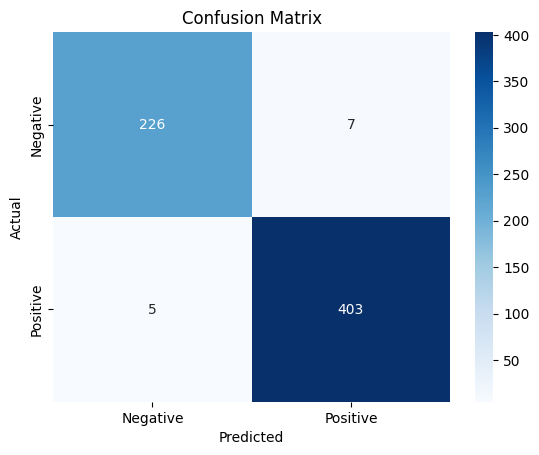

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap cho Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
false_positive_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]
false_negative_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]

# Lấy dữ liệu đã chuẩn hóa của False Positives và False Negatives
false_positives_scaled = x_test.iloc[false_positive_indices]
false_negatives_scaled = x_test.iloc[false_negative_indices]

# Đảo ngược chuẩn hóa để lấy lại dữ liệu ban đầu
false_positives_original = scaler.inverse_transform(false_positives_scaled[numerical_columns])
false_negatives_original = scaler.inverse_transform(false_negatives_scaled[numerical_columns])

# Chuyển lại dữ liệu thành DataFrame với các cột gốc
false_positives_original_df = pd.DataFrame(false_positives_original, columns=numerical_columns)
false_negatives_original_df = pd.DataFrame(false_negatives_original, columns=numerical_columns)

# In kết quả
print("False Positive Data (Original):")
print(false_positives_original_df)

print("\nFalse Negative Data (Original):")
print(false_negatives_original_df)

False Positive Data (Original):
   income_annum  loan_amount  loan_term  cibil_score  \
0      1.708959     1.330251  -1.554979    -1.182708   
1      1.171930     1.819181  -0.850918     0.443269   
2     -1.155196    -1.258857  -1.554979    -0.541642   
3     -1.047790    -1.147736  -1.554979    -0.302699   
4      1.064524     0.307942   1.613292    -0.285215   
5      0.634901     0.552407  -1.202949    -0.809724   
6     -1.477413    -1.425538  -1.554979    -1.066151   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  1.746422                -0.440142             0.880759   
1                 -0.988476                -0.760688             0.240535   
2                 -0.540386                -0.577519            -1.161334   
3                 -0.215906                -0.394350            -1.028874   
4                 -0.772157                 1.093898             1.366445   
5                  1.097463                -0.440142     